In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import utils
#from utils import read_json, group_by, normalize_module_name

In [3]:
!ls .benchmarks/Linux-CPython-3.13-64bit

0001_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141508.json
0002_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141729_uncommited-changes.json
0003_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_143804_uncommited-changes.json
0004_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_144336_uncommited-changes.json
0005_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_145121_uncommited-changes.json
0006_2f601b3a51b470ddefa84223881c054068dc5378_20250815_155414_uncommited-changes.json
0007_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_163216.json
0008_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_164631.json


In [6]:
base_path = os.path.join(os.getcwd(), ".benchmarks/Linux-CPython-3.13-64bit")

fname = os.path.join(base_path, "0007_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_163216.json")
lst = utils.read_json(fname, machine="gonzales")

fname = os.path.join(base_path, "0008_406f2c4573be6611d1989d19a9d7a387588a55ad_20250815_164631.json")
lst += utils.read_json(fname, machine="gonzales")

In [7]:
len(lst)

36

In [8]:
# normalize the backend names
for elem in lst:
    elem["params"]["xp"] = utils.normalize_module_name(elem["params"]["xp"])

In [33]:
import pandas as pd

In [38]:
lst[0]

{'group': None,
 'name': 'test_rbf[50-cpu-numpy]',
 'fullname': 'rbf_bench.py::test_rbf[50-cpu-numpy]',
 'params': {'N': 50, 'device': 'cpu', 'xp': 'numpy'},
 'param': '50-cpu-numpy',
 'extra_info': {'jit': 'jit'},
 'options': {'disable_gc': True,
  'timer': 'perf_counter',
  'min_rounds': 7,
  'max_time': 2.0,
  'min_time': 0.2,
  'warmup': 10},
 'stats': {'min': 0.010815927060320973,
  'max': 0.011308940659509971,
  'mean': 0.011098619025599743,
  'stddev': 0.0002109694700170461,
  'rounds': 7,
  'median': 0.011222016009269283,
  'iqr': 0.00037535047740675474,
  'q1': 0.010896686382766347,
  'q3': 0.011272036860173102,
  'iqr_outliers': 0,
  'stddev_outliers': 2,
  'outliers': '2;0',
  'ld15iqr': 0.010815927060320973,
  'hd15iqr': 0.011308940659509971,
  'ops': 90.10129978274142,
  'total': 0.07769033317919821,
  'iterations': 100}}

In [56]:
def to_pandas(list_of_benchmarks):
    lst = []
    for entry in list_of_benchmarks:
        dct = {"backend": entry["params"]["xp"],
               "device": entry["params"]["device"],
               "N": entry["params"]["N"],
               "jit": entry["extra_info"]["jit"],
               "time": entry["stats"]["median"],
               "machine": "gonzales",
        }
        lst.append(dct)
    return pd.DataFrame(lst)

In [57]:
df = to_pandas(lst)
df

,backend,device,N,jit,time,machine
0,numpy,cpu,50,jit,0.011222,gonzales
1,jax.numpy,cpu,50,jit,0.001326,gonzales
2,torch,cpu,50,jit,0.001308,gonzales
3,numpy,cpu,100,jit,0.064762,gonzales
4,jax.numpy,cpu,100,jit,0.006007,gonzales
5,torch,cpu,100,jit,0.003910,gonzales
6,numpy,cpu,200,jit,0.288843,gonzales
7,jax.numpy,cpu,200,jit,0.020491,gonzales
8,torch,cpu,200,jit,0.014652,gonzales
9,numpy,cpu,500,jit,1.735217,gonzales


# Base timinigs (numpy, pythran AOT)

In [48]:
df_np = df.loc[(df["backend"] == "numpy") & (df["jit"] == "eager") ]
df_np

,backend,device,N,jit,time,machine
18,numpy,cpu,50,eager,0.003570,gonzales
21,numpy,cpu,100,eager,0.016632,gonzales
24,numpy,cpu,200,eager,0.070284,gonzales
27,numpy,cpu,500,eager,0.436593,gonzales
30,numpy,cpu,1000,eager,1.730120,gonzales
33,numpy,cpu,2000,eager,8.502602,gonzales


slope =  2.07859379652414


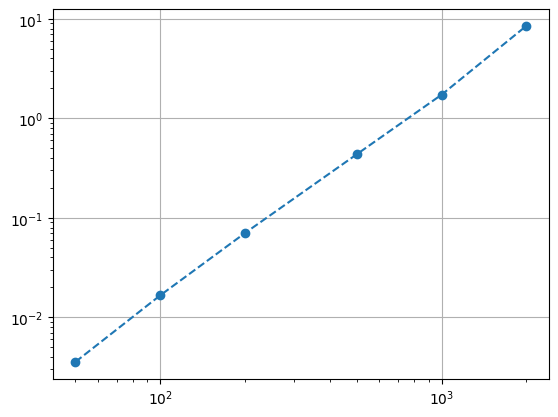

In [64]:
plt.loglog(df_np.N, df_np.time, 'o--')
plt.grid(True)

from scipy.stats import linregress

print("slope = ", linregress(np.log(df_np.N), np.log(df_np.time)).slope)

# Speedups w.r.t. numpy/pythran AOT

In [50]:
grp_dict = df.groupby(["machine", "jit", "backend", "device"]).groups

base_idx = grp_dict[("gonzales", "eager", "numpy", "cpu")]
base_gonz = df.iloc[base_idx]

dfs = []

for key, idx in grp_dict.items():
    df_ = df.iloc[idx]
    base_df = base_gonz if key[0] == "gonzales" else base_qgpu3

    df__ = pd.concat([
                df_.set_index("N"),
                base_df.set_index("N")[["time"]].rename(columns={"time": "np_time"})
                    ], axis=1, join='inner'
           ).reset_index()
    df__["speedup"] = df__["np_time"] / df__["time"]

    dfs.append(df__)

df_ = pd.concat(dfs, ignore_index=True)
df_

,N,backend,device,jit,time,machine,np_time,speedup
0,50,jax.numpy,cpu,eager,0.007111,gonzales,0.003570,0.502111
1,100,jax.numpy,cpu,eager,0.031924,gonzales,0.016632,0.520991
2,200,jax.numpy,cpu,eager,0.118334,gonzales,0.070284,0.593948
3,500,jax.numpy,cpu,eager,0.758952,gonzales,0.436593,0.575258
4,1000,jax.numpy,cpu,eager,2.551572,gonzales,1.730120,0.678060
5,2000,jax.numpy,cpu,eager,11.554189,gonzales,8.502602,0.735889
6,50,numpy,cpu,eager,0.003570,gonzales,0.003570,1.000000
7,100,numpy,cpu,eager,0.016632,gonzales,0.016632,1.000000
8,200,numpy,cpu,eager,0.070284,gonzales,0.070284,1.000000
9,500,numpy,cpu,eager,0.436593,gonzales,0.436593,1.000000


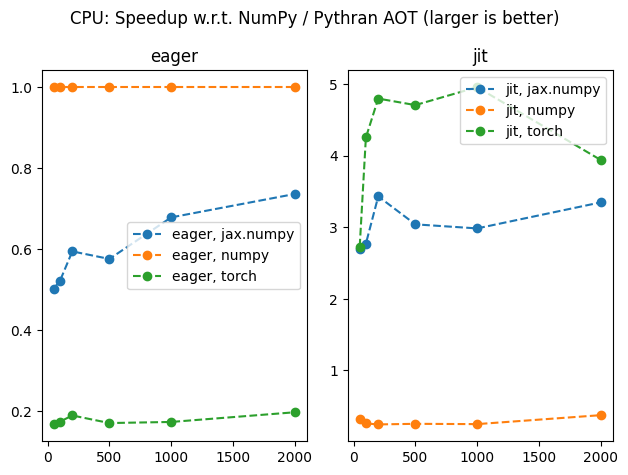

In [55]:
fig, ax = plt.subplots(1, 2)
plt.suptitle("CPU: Speedup w.r.t. NumPy / Pythran AOT (larger is better)")

df_cpu = df_[df_.device == "cpu"].reset_index(drop=True)

grp_dict = df_cpu.groupby(["machine", "jit", "backend"]).groups
for key, idx in grp_dict.items():
    this_df = df_cpu.iloc[idx]
    
    r = {"eager": 0, "jit": 1}[key[1]]
    
    ax[r].plot(this_df["N"], this_df["speedup"], 'o--', label=f"{key[1]}, {key[2]}")

ax[0].legend()
ax[1].legend()

ax[0].set_title('eager')
ax[1].set_title('jit')

plt.tight_layout()